In [1]:
##  import the libraries first 

# Tensorflow & Keras Libraries
import tensorflow as tf
from tensorflow import keras

# Helper Libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Load the data from the dataset
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [3]:
## Next, we are going to map the images into classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
## Exploring the data
print(train_images.shape)

#Each Label is between 0-9
print(train_labels)

print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


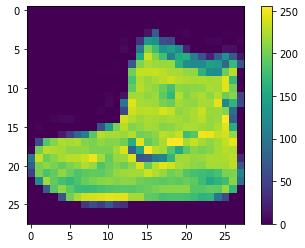

In [5]:
## Visualise some data.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
## Pre-processing of the data 

## We have to scale the images from 0-1 to feed it into the Neural Network

train_images = train_images / 255.0

test_images = test_images / 255.0

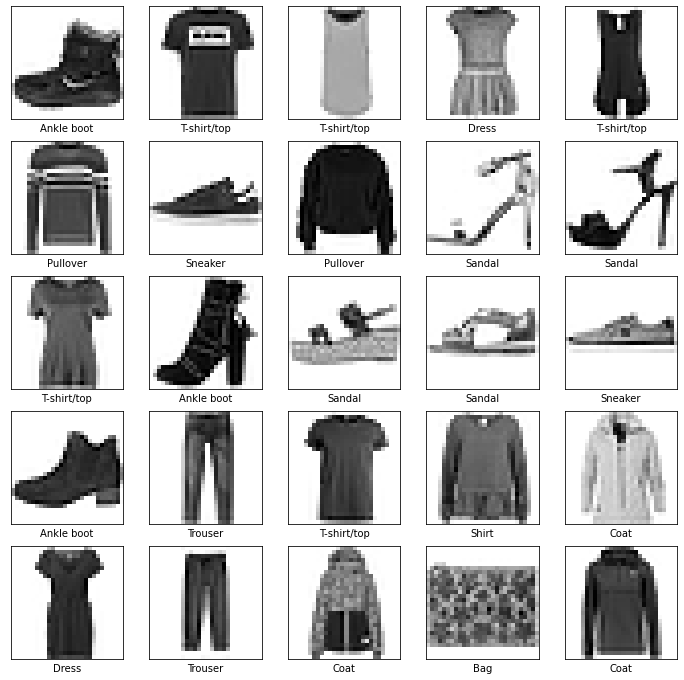

In [7]:
## Let’s display some images.

plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [8]:
# Setup The Layers
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
## Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Model Training
model.fit(train_images, train_labels, epochs=10)

## default batch_size = None in keras, i.e taken 1 
## o/p : 60000 / 1 = 60000

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4932 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3670 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3338 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3111 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2946 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2784 - accuracy: 0.8948
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2660 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2560 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2463 - accuracy: 0.90 - 5s 3ms/step - loss: 0.2463 - accuracy: 0.9070
Epoch 10/10
1875/1875 [=================

In [10]:
## Evaluating Accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test Accuracy:', round(test_acc*100,3),'%')

313/313 [==============================] - 1s 2ms/step - loss: 0.3314 - accuracy: 0.8896
Test Accuracy: 88.96 %


In [11]:
## Making Predictions
predictions=model.predict(test_images)
predictions[0]

array([8.8704774e-06, 5.4750890e-06, 2.7213357e-05, 1.8909033e-07,
       4.1742879e-07, 3.0775049e-03, 1.2493909e-04, 3.4765013e-02,
       4.3653667e-06, 9.6198595e-01], dtype=float32)

In [12]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label= np.argmax(predictions_array)
    if predicted_label == true_label:
        color='green'
    else:
        color='red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

In [13]:
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label=predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

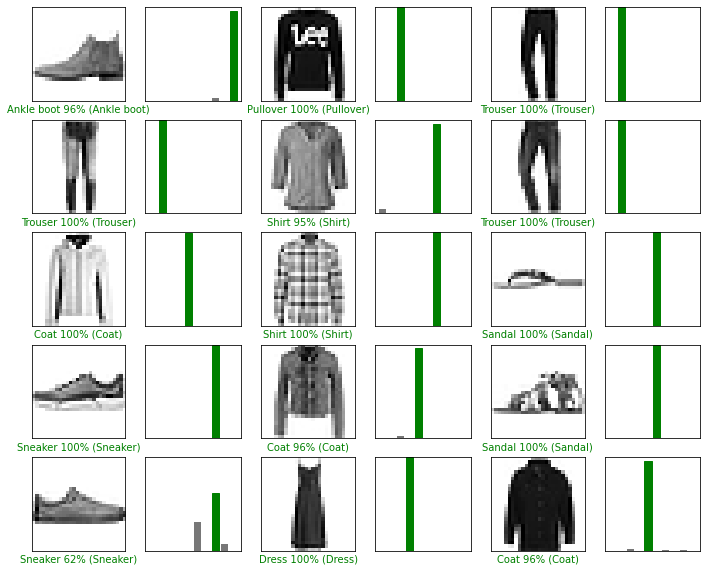

In [14]:
## Now, let’s plot several images and their predictions. 
## Correct ones are green, while the incorrect ones are red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()